In [105]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification
# import tensorflow as tf
# from tensorflow.keras import models, layers

In [106]:
data = pd.read_csv(r"data\output.csv", encoding='utf-8-sig')

In [107]:
data.head()

,Unnamed: 0,text,sentiment,label
0,0,"module , ek program hoti hai , jismen ya to so...",neutral,1
1,1,aur hamne aume samood ke pas unke bhaee saleh ...,positive,2
2,2,"aur jab unhen yad dilaya jata hai , to ve yad ...",neutral,1
3,3,tumhen २०११ ka ted prize mil gaya hai\n,positive,2
4,4,unhonne bad science karne ke lie ye delhi univ...,neutral,1


In [108]:
data = data.drop(columns=['Unnamed: 0'])

In [109]:
data.shape

(2766, 3)

In [110]:
data.isnull().sum()

text         0
sentiment    0
label        0
dtype: int64

In [111]:
data.dropna(inplace=True)

In [112]:
data.isnull().sum()

text         0
sentiment    0
label        0
dtype: int64

In [113]:
data['label'].value_counts()

label
1    1234
2     987
0     545
Name: count, dtype: int64

In [114]:
data['sentiment'].value_counts()

sentiment
neutral     1234
positive     987
negative     545
Name: count, dtype: int64

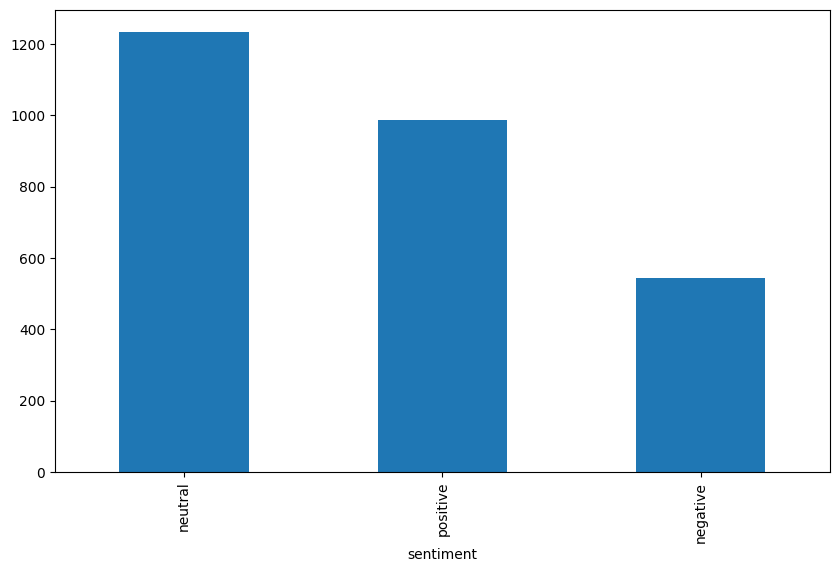

In [115]:
plt.figure(figsize=(10,6))
data['sentiment'].value_counts().plot.bar()
plt.show()

In [116]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [117]:
def advanced_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [118]:
data['processed_text'] = data['text'].apply(advanced_preprocess)

In [119]:
data.head()

,text,sentiment,label,processed_text
0,"module , ek program hoti hai , jismen ya to so...",neutral,1,module ek program hoti hai jismen ya source co...
1,aur hamne aume samood ke pas unke bhaee saleh ...,positive,2,aur hamne aume samood ke pa unke bhaee saleh k...
2,"aur jab unhen yad dilaya jata hai , to ve yad ...",neutral,1,aur jab unhen yad dilaya jata hai yad nahin karte
3,tumhen २०११ ka ted prize mil gaya hai\n,positive,2,tumhen ka ted prize mil gaya hai
4,unhonne bad science karne ke lie ye delhi univ...,neutral,1,unhonne bad science karne ke lie ye delhi univ...


In [120]:
data["text"][0]

'module , ek program hoti hai , jismen ya to source code ya machine language ke form men instructions nihit hote hain.\n'

In [121]:
data["processed_text"][4]

'unhonne bad science karne ke lie ye delhi university ke kirorimal college chale ge jahan inhonne vijnjan graduate ki degree prapt ki'

In [122]:
data[["text", "processed_text"]].head()

,text,processed_text
0,"module , ek program hoti hai , jismen ya to so...",module ek program hoti hai jismen ya source co...
1,aur hamne aume samood ke pas unke bhaee saleh ...,aur hamne aume samood ke pa unke bhaee saleh k...
2,"aur jab unhen yad dilaya jata hai , to ve yad ...",aur jab unhen yad dilaya jata hai yad nahin karte
3,tumhen २०११ ka ted prize mil gaya hai\n,tumhen ka ted prize mil gaya hai
4,unhonne bad science karne ke lie ye delhi univ...,unhonne bad science karne ke lie ye delhi univ...


In [123]:
X = data['processed_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 2212
Testing set size: 554


In [124]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [125]:
print("TF-IDF Feature matrix shape:", X_train_tfidf.shape)

TF-IDF Feature matrix shape: (2212, 5000)


In [126]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [127]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [128]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [129]:
multinom_model = MultinomialNB()
multinom_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [130]:
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.65      0.32      0.43       109
           1       0.66      0.83      0.73       247
           2       0.66      0.63      0.64       198

    accuracy                           0.66       554
   macro avg       0.65      0.59      0.60       554
weighted avg       0.66      0.66      0.64       554

0.6570397111913358


In [131]:
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Model Performance:\n")
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

Random Forest Model Performance:

              precision    recall  f1-score   support

           0       0.94      0.55      0.69       109
           1       0.68      0.97      0.80       247
           2       0.88      0.61      0.72       198

    accuracy                           0.76       554
   macro avg       0.83      0.71      0.74       554
weighted avg       0.80      0.76      0.75       554

0.7581227436823105


In [132]:
y_pred_multi = multinom_model.predict(X_test_tfidf)
print("multinom_model Performance:\n")
print(classification_report(y_test, y_pred_multi))
print(accuracy_score(y_test, y_pred_multi))

multinom_model Performance:

              precision    recall  f1-score   support

           0       1.00      0.06      0.12       109
           1       0.63      0.89      0.74       247
           2       0.63      0.63      0.63       198

    accuracy                           0.63       554
   macro avg       0.75      0.53      0.50       554
weighted avg       0.70      0.63      0.58       554

0.6335740072202166


In [133]:
linear_svc_pred = linear_svc.predict(X_test_tfidf)
print("linear_svc Performance:\n")
print(accuracy_score(y_test, linear_svc_pred))
print(classification_report(y_test, linear_svc_pred))

linear_svc Performance:

0.7454873646209387
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       109
           1       0.77      0.81      0.79       247
           2       0.74      0.72      0.73       198

    accuracy                           0.75       554
   macro avg       0.74      0.72      0.73       554
weighted avg       0.74      0.75      0.74       554



In [134]:
# model = models.Sequential()
# model.add(layers.Dense(32, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(3, activation='softmax'))

In [135]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [136]:
# test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test)

In [137]:
# print(test_loss, test_accuracy)

In [138]:
# model.fit(X_train_tfidf, y_train, epochs=20, batch_size=32, validation_split=0.2, validation_data=(X_test_tfidf, y_test))

In [139]:
# model.summary()

In [ ]:
data[data["sentiment"] == "positive"].head(10)

,text,sentiment,label,processed_text
1,aur hamne aume samood ke pas unke bhaee saleh ...,positive,2,aur hamne aume samood ke pa unke bhaee saleh k...
3,tumhen २०११ ka ted prize mil gaya hai\n,positive,2,tumhen ka ted prize mil gaya hai
5,"phir hamne unhen bheja, taki maloom karen ki c...",positive,2,phir hamne unhen bheja taki maloom karen ki ca...
9,mujhe dekhne ke lie jab aap ऑnlain ho dhanyvad!\n,positive,2,mujhe dekhne ke lie jab aap ऑnlain ho dhanyvad
10,jo azasartapa un logon ke lie guidance v mercy...,positive,2,jo azasartapa un logon ke lie guidance v mercy...
11,france men is ek deed ki news bijli ki tarah p...,positive,2,france men ek deed ki news bijli ki tarah phai...
14,ends ke uddeshyon ki disposal se koson pendenc...,positive,2,end ke uddeshyon ki disposal se koson pendency...
15,use apne creatures par poorn adhikar prapt hai...,positive,2,use apne creature par poorn adhikar prapt hai ...
17,hamne tumhen paida kiya phir tum sach kyon nah...,positive,2,hamne tumhen paida kiya phir tum sach kyon nah...
19,kuchh mahine hue vahan normal democratic elect...,positive,2,kuchh mahine hue vahan normal democratic elect...


In [198]:
data["text"][15]

'use apne creatures par poorn adhikar prapt hai. aur vah wise, aware rakhnevala hai\n'

In [199]:
test_data_pos = "use apne creatures par poorn adhikar prapt hai. aur vah wise, aware rakhnevala hai"

In [200]:
test_pos_cleaned = advanced_preprocess(test_data_pos)
test_pos_array = tfidf_vectorizer.transform([test_pos_cleaned]).toarray()

In [201]:
print(test_pos_array)

[[0. 0. 0. ... 0. 0. 0.]]


In [202]:
linear_svc.predict(test_pos_array)

array([2])

In [179]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
rf_cm = confusion_matrix(y_test, y_pred_rf)
multi_cm = confusion_matrix(y_test, y_pred_multi)

In [147]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Logistic Regression Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [148]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(multi_cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Multinomial Naive Bayes Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

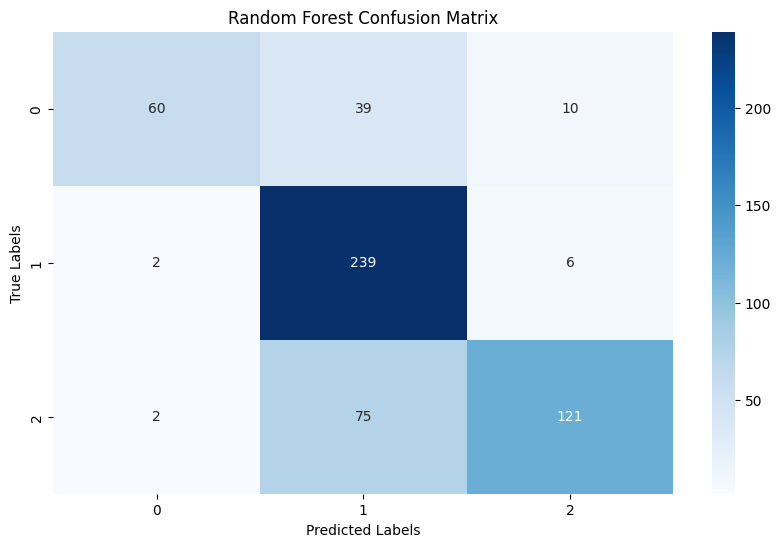

In [149]:
plt.figure(figsize=(10, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [150]:
# from transformers import pipeline

# sentiment_pipeline = pipeline("sentiment-analysis",model="xlm-roberta-base")

# texts = [
#     "kya aap vakee raddi men sare photo video khiskana chahte hain"
# ]

# results = sentiment_pipeline(texts)
# for text, result in zip(texts, results):
#     print(f"Text: {text}\nSentiment: {result['label']}, Score: {result['score']}\n")

In [151]:
# tokenizerg = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")
# modelg = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=3)

# text = "The weather is okay today, not too hot or cold."
# encoded_input = tokenizerg(text, return_tensors='pt')

# output = modelg(**encoded_input)

# logits = output.logits

# probabilities = torch.softmax(logits, dim=1)

# predicted_class = torch.argmax(probabilities, dim=1).item()

# sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}

# predicted_sentiment = sentiment_labels[predicted_class]

# print(f"Text: {text}")
# print(f"Predicted Sentiment: {predicted_sentiment}")

In [152]:
import joblib

joblib.dump(tfidf_vectorizer, 'models/vectorizer.joblib')

['models/vectorizer.joblib']

In [153]:
joblib.dump(lr_model, 'models/lr_model.joblib')
joblib.dump(linear_svc,'models/linear_svc.joblib')
joblib.dump(rf_model, 'models/rf_model.joblib')
joblib.dump(multinom_model,'models/multi_model.joblib')

['models/multi_model.joblib']